<a href="https://colab.research.google.com/github/Desh86/Project2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1

## Load and Inspect data

## Dataset 1 - Stroke prediction

In [42]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
from seaborn import heatmap

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
fpath ='/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(fpath)
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


1. Source of data: www.kaggle.com


2. Brief description of data :
\
The dataset is used to predict whether a patient i likely to get a stroke based on the input parameters.
\
Each row in the data provides relevant information about the patient.

3. What is the Target: stroke

4. What does one row represent? (A person? A business? An event? A product?): A person's data

5. Is this a classification or regression problem? classification

6. How many features does the data have? 12

7. How many rows are in the dataset?5110

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? The data seems quite balanced and sufficient, no issues provied the dataset is relatively clean and complete.


# Load and Inspect Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [23]:
## Check for duplicates
duplicated_rows = df.duplicated()
df.duplicated().sum()

0

In [24]:
## Check for missing values
missing_values = df.isna().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts(normalize=True))
  print('\n')

Value Counts for gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64


Value Counts for ever_married
Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64


Value Counts for work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64


Value Counts for Residence_type
Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64


Value Counts for smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64




## Clean Data

In [25]:
# Dropping id (permanently)
df = df.drop(columns=['id'])
df.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,61.0,0,0,1,1,0,202.21,NaN,2,1
2,1,80.0,0,1,1,0,0,105.92,32.5,2,1
3,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,1,0,174.12,24.0,2,1


Drop the unwanted 'id' columns

No duplicates exist in dataset

No unsual outliers




In [26]:
# Fill missing values with zero
df['bmi'] = df['bmi'].fillna(0)
df['bmi'].value_counts(dropna=False)

0.0     201
28.7     41
28.4     38
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: bmi, Length: 419, dtype: int64

In [27]:
## Check for missing values
missing_values = df.isna().sum()
missing_values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

In [10]:
# drop all rows that contain 'Other'
df = df.drop(df[df['gender'] == 'Other'].index)

In [35]:
cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts(normalize=True))
  print('\n')

Value Counts for gender
Female    0.586025
Male      0.413975
Name: gender, dtype: float64


Value Counts for ever_married
Yes    0.656293
No     0.343707
Name: ever_married, dtype: float64


Value Counts for work_type
Private          0.572323
Self-employed    0.160305
Children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: work_type, dtype: float64


Value Counts for residence_type
Urban    0.508123
Rural    0.491877
Name: residence_type, dtype: float64


Value Counts for smoking_status
never smoked       0.370327
Unknown            0.302212
formerly smoked    0.173028
smokes             0.154433
Name: smoking_status, dtype: float64




In [12]:
# Standardize the values in the Central column
df['work_type'].replace({'children':'Children'}, inplace = True)
df['work_type'].value_counts()



Private          2924
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [36]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [37]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **UNIVARIATE VISUALS**

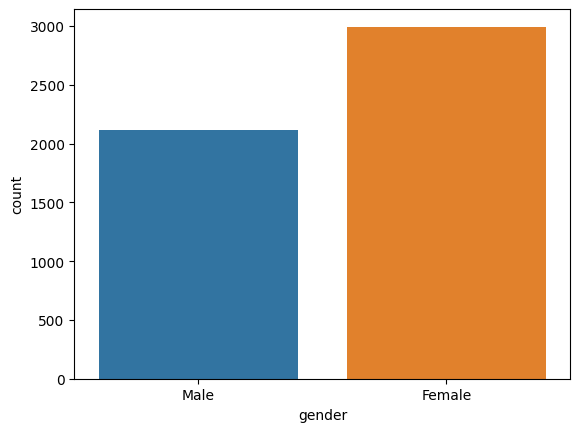

In [38]:
# Seaborn countplot
ax = sns.countplot(data=df, x="gender")


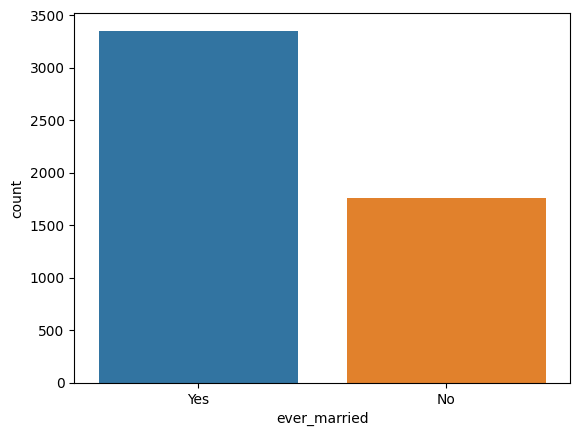

In [ ]:
# Seaborn countplot
ax = sns.countplot(data=df, x="ever_married")

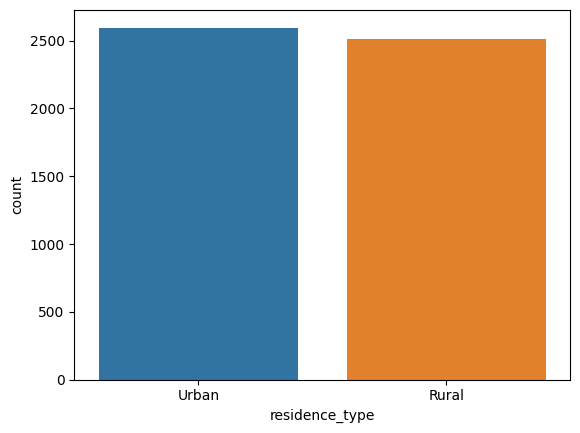

In [40]:
# Seaborn countplot
ax = sns.countplot(data=df, x="residence_type")

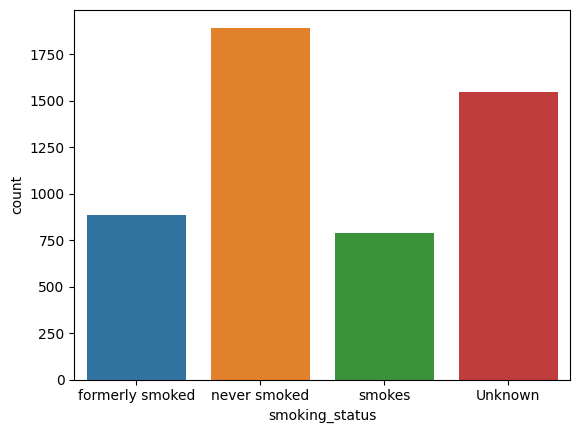

In [41]:
# Seaborn countplot
ax = sns.countplot(data=df, x="smoking_status")

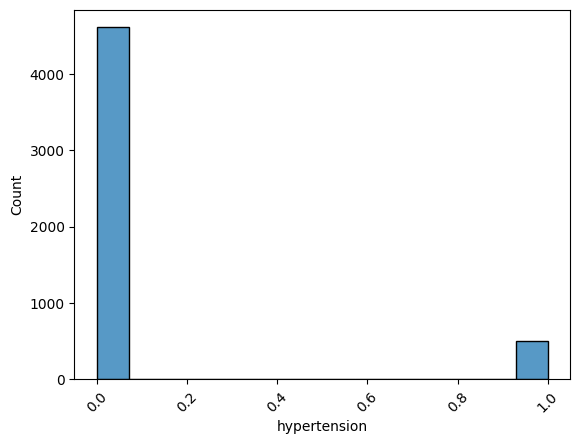

In [ ]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x='hypertension')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



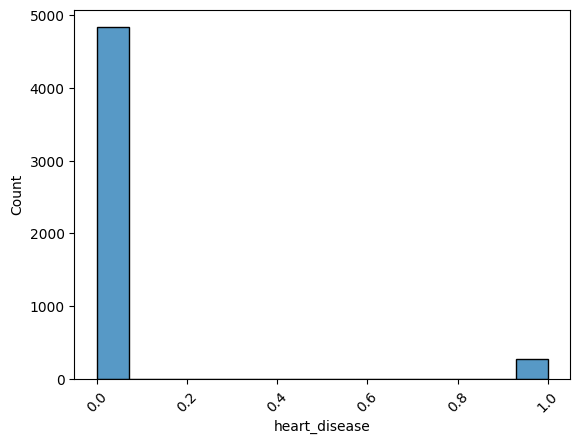

In [ ]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x='heart_disease')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

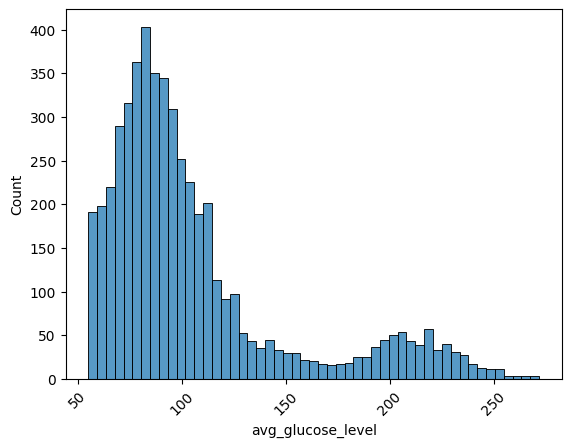

In [ ]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x='avg_glucose_level')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

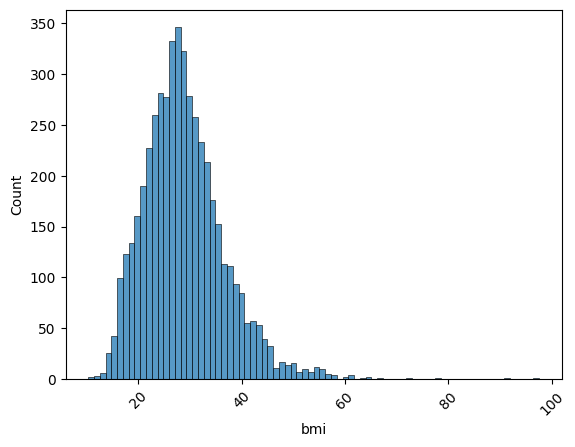

In [ ]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x='bmi')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

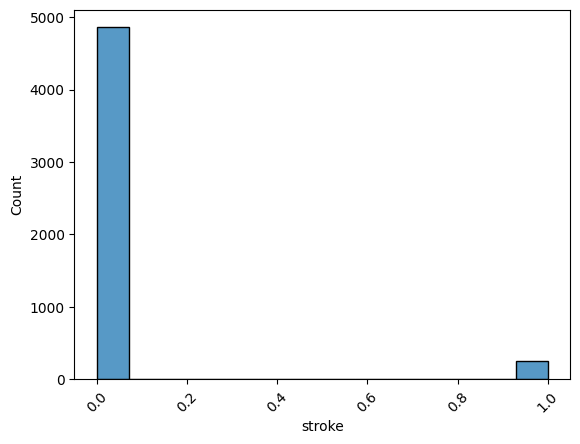

In [ ]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x='stroke')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

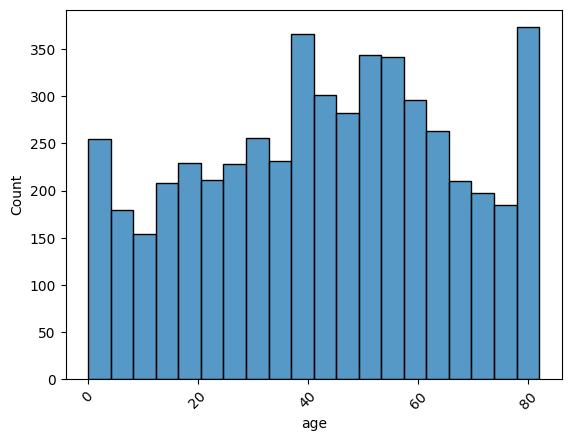

In [ ]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x='age')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

## Project 2 Part 3

### 1a Correlations between data


In [ ]:
corr = df.corr(numeric_only = True)
corr.round(2)


,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Stroke
Age,1.00,0.28,0.26,0.24,0.22,0.25
Hypertension,0.28,1.00,0.11,0.17,0.07,0.13
Heart_Disease,0.26,0.11,1.00,0.16,-0.03,0.13
Avg_Glucose_Level,0.24,0.17,0.16,1.00,0.08,0.13
BMI,0.22,0.07,-0.03,0.08,1.00,-0.05
Stroke,0.25,0.13,0.13,0.13,-0.05,1.00


### 1b Visualization of the Correlations on a Heatmap

The results indicate that a persons age contains a strong correlation with all columns including the target ( stoke)

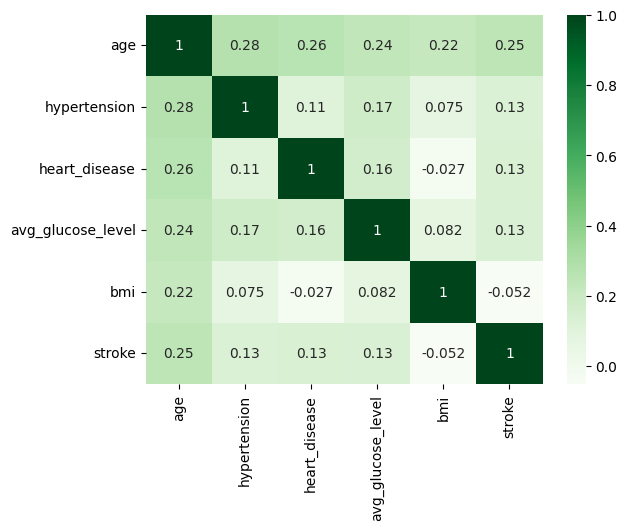

In [ ]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

*2a*



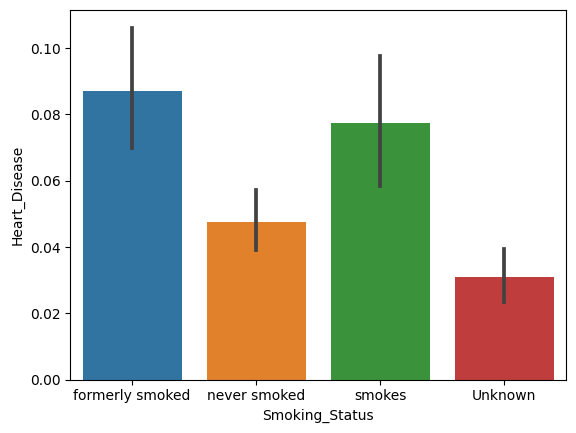

In [ ]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Smoking_Status', y="Heart_Disease")


This graph indicates the correlation between having heart disease and smoking.
Its clear that people which have never smoked as a less chance of having heart disease.

Surprisingly people who used to smoke and stopped have heart disease as compared to people who are active smokers.

We also have a number of people on our dataset which we do not have a smoking status data for.

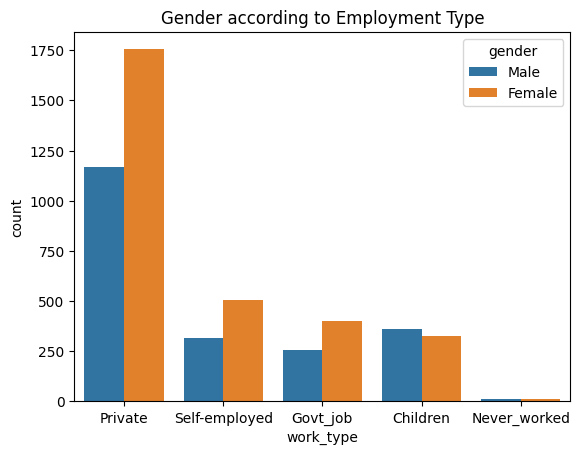

In [43]:
ax= sns.countplot(data=df, x='work_type', hue = 'gender');
ax.set(title='Gender according to Employment Type');

This graph indicates the gender of people according to the type of employment work they do.

We can see a trend of more females in the working environment in all 3 sectors, with the most being in the Private sector followed by self employment and lastly government sector.

We have more male children in our dataset and while the never worked catogorie is quite balanced between male and female.


# Project 2 Part 4


### Modeling

In [45]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['stroke'].value_counts(normalize = True)


0    0.951262
1    0.048738
Name: stroke, dtype: float64

In [13]:
df["work_type"]=df["work_type"].str.replace("Private","0")
df["work_type"]=df["work_type"].str.replace("Self-employed","1")
df["work_type"]=df["work_type"].str.replace("Govt_job","2")
df["work_type"]=df["work_type"].str.replace("Children","3")
df["work_type"]=df["work_type"].str.replace("Never_worked","4")
df["work_type"]=df["work_type"].astype("int32")

In [14]:
df["gender"]=df["gender"].str.replace("Male","1")
df["gender"]=df["gender"].str.replace("Female","0")
df["gender"]=df["gender"].astype("int32")

In [15]:
df["ever_married"]=df["ever_married"].str.replace("Yes","1")
df["ever_married"]=df["ever_married"].str.replace("No","0")
df["ever_married"]=df["ever_married"].astype("int32")

In [16]:
df["residence_type"]=df["residence_type"].str.replace("Rural","0")
df["residence_type"]=df["residence_type"].str.replace("Urban","1")
df["residence_type"]=df["residence_type"].astype("int32")

In [17]:
df["smoking_status"]=df["smoking_status"].str.replace("formerly smoked","0")
df["smoking_status"]=df["smoking_status"].str.replace("Unknown","1")
df["smoking_status"]=df["smoking_status"].str.replace("never smoked","2")
df["smoking_status"]=df["smoking_status"].str.replace("smokes","3")
df["smoking_status"]=df["smoking_status"].astype("int32")

In [59]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [29]:
# Define y(Target) and x (Features)
y = df['stroke']
X = df.drop(columns = 'stroke')

In [30]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [31]:
## Evaluation function
def evluate_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the accuracy scores for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")


## Decision Tree Classifier Model

In [143]:
## Make, fit, and evalaute Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

evluate_classification(tree_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.911


In [166]:
# Make a pipeline to scale the data and fit a model
tree_pipe = make_pipeline(StandardScaler(),  DecisionTreeClassifier())
# Train the model on the data
tree_pipe.fit(X_train, y_train)
# class predictions (not predicted probabilities)
predictions1 = tree_pipe.predict(X_test)
print('Predictions1:')
predictions1

Predictions1:


array([0, 0, 0, ..., 0, 0, 0])

In [187]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1198
           1       0.19      0.16      0.18        80

    accuracy                           0.91      1278
   macro avg       0.57      0.56      0.56      1278
weighted avg       0.90      0.91      0.90      1278



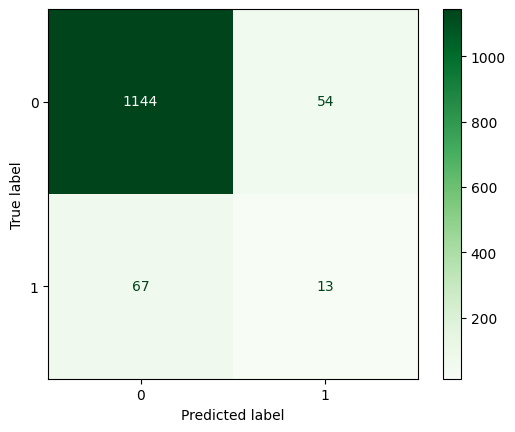

In [176]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions1,
cmap='Greens')

### Hypertune using GridSearchCV

In [196]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [197]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4]}



In [199]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid, n_jobs = -1, verbose = 1)

In [201]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [202]:
# Obtain the best combination directly
grid_search.best_params_


{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [203]:
# Now define the best version of the model with refit included
best_model = grid_search.best_estimator_


In [205]:
# Use custom function to evalute the model
evluate_classification(best_model,X_train,X_test,y_train,y_test)



Training Accuracy: 0.958
Test Accuracy: 0.940


Hypertuning increased the accuracy from 0.91% to 0.94%

## Random Forest Classifier Model

In [186]:
## Make, fit, and evalaute RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

evluate_classification(rf_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.939


In [160]:
# Make a pipeline to scale the data and fit a model
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
# Train the model on the data
rf_pipe.fit(X_train, y_train)
# class predictions (not predicted probabilities)
predictions2 = rf_pipe.predict(X_test)
print('Predictions2:')
predictions2

Predictions2:


array([0, 0, 0, ..., 0, 0, 0])

In [185]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.67      0.03      0.05        80

    accuracy                           0.94      1278
   macro avg       0.80      0.51      0.51      1278
weighted avg       0.92      0.94      0.91      1278



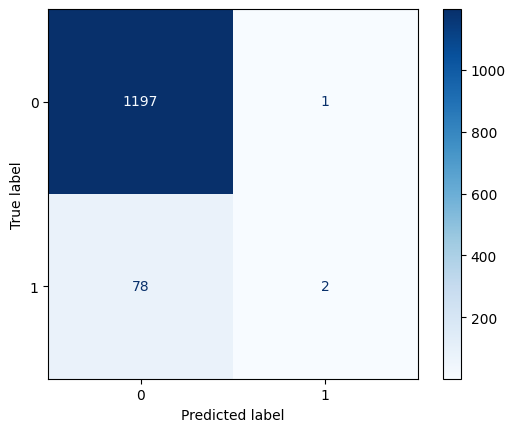

In [175]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions2,
cmap='Blues')

### Hypertune using GridSearchCV

In [206]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [227]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20, None],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4,6,8]}

In [228]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, n_jobs = -1, verbose = 1)

In [229]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 6, 8]},
             verbose=1)

In [230]:
# Obtain the best combination directly
grid_search.best_params_

{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 8}

In [231]:
# Now define the best version of the model with refit included
best_model = grid_search.best_estimator_

In [233]:
# Use custom function to evalute the model
evluate_classification(best_model,X_train,X_test,y_train,y_test)

Training Accuracy: 0.964
Test Accuracy: 0.938


Hypertuning did not make any difference in this instance.

## Bagging Classifier Model

In [148]:
## Make, fit, and evalaute BaggingClassifier
bag_clf = BaggingClassifier(random_state=42)
bag_clf.fit(X_train, y_train)

evluate_classification(bag_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.993
Test Accuracy: 0.933


In [163]:
# Make a pipeline to scale the data and fit a model
bag_pipe = make_pipeline(StandardScaler(), BaggingClassifier())
# Train the model on the data
bag_pipe.fit(X_train, y_train)
# class predictions (not predicted probabilities)
predictions3 = bag_pipe.predict(X_test)
print('Predictions3:')
predictions3


Predictions3:


array([0, 0, 0, ..., 0, 0, 0])

In [184]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1198
           1       0.33      0.05      0.09        80

    accuracy                           0.93      1278
   macro avg       0.64      0.52      0.53      1278
weighted avg       0.90      0.93      0.91      1278



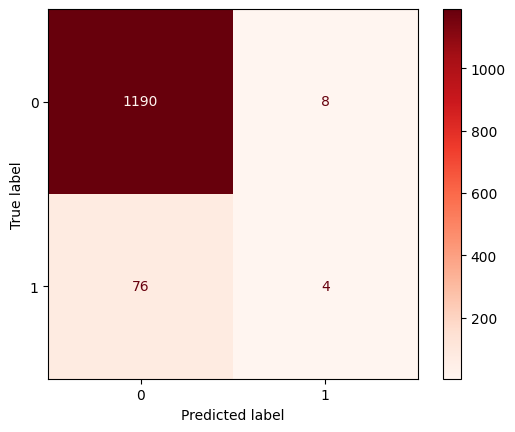

In [181]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions3,cmap='Reds');


### Hypertune using GridSearchCV

In [219]:
bag_clf.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [220]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [2, 3, 4,5,6,7,8,9,10]}

In [221]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, n_jobs = -1, verbose = 1)

In [222]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 990 candidates, totalling 4950 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 4950.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py", line 326, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(estimator=BaggingClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [223]:
# Obtain the best combination directly
grid_search.best_params_

{'max_features': 10, 'max_samples': 7, 'n_estimators': 7}

In [224]:
# Now define the best version of the model with refit included
best_model = grid_search.best_estimator_

In [225]:
# Use custom function to evalute the model
evluate_classification(best_model,X_train,X_test,y_train,y_test)


Training Accuracy: 0.956
Test Accuracy: 0.937


Hypertuning increased the accuracy from 0.93 to 0.94

### Best tuned model results:

Decision Tree Classifier - 0.94% with hypertuning

Randon Forest Classifier - 0.94% without hypertuning

Bagging Classifier - 0.937% with hypertuning

## PCA Techniques

In [35]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [32]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)


In [36]:
# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

In [33]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)

In [37]:
# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.
# We can perform the same processing steps on all columns.
pca_processing = make_pipeline(scaler, pca)

print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', pca_processing.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - pca_processing.fit_transform(X_train).shape[1])

Shape before PCA: (3831, 10)
Shape after PCA: (3831, 9)
Column count reduced by:  1


In [73]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(7, 8))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=10)
  plt.ylabel('True', fontsize=10)
  plt.show()

## Without using PCA for Tree Decision Classifier Model

In [65]:
%%time
# Without PCA
tree_clf = DecisionTreeClassifier()

# Now we will build the pipeline
tree_pipe = make_pipeline(scaler, tree_clf)
tree_pipe.fit(X_train, y_train)

CPU times: user 21.2 ms, sys: 0 ns, total: 21.2 ms
Wall time: 26.5 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Train Report:               precision    recall  f1-score   support

           0       0.82      0.04      0.08      3644
           1       0.04      0.82      0.08       187

    accuracy                           0.08      3831
   macro avg       0.43      0.43      0.08      3831
weighted avg       0.78      0.08      0.08      3831

Test Report:               precision    recall  f1-score   support

           0       0.90      0.05      0.09      1216
           1       0.05      0.90      0.09        62

    accuracy                           0.09      1278
   macro avg       0.48      0.48      0.09      1278
weighted avg       0.86      0.09      0.09      1278



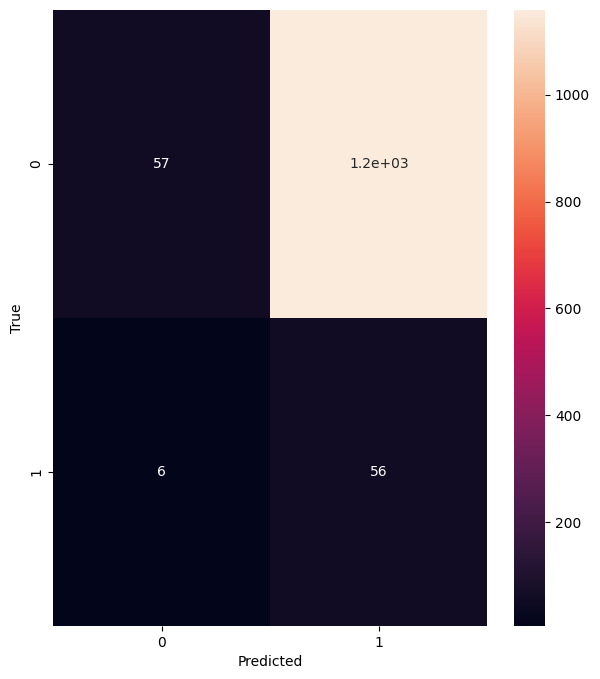

CPU times: user 280 ms, sys: 113 ms, total: 393 ms
Wall time: 275 ms


In [74]:
%%time
# evaluate the pipeline
eval_classification(tree_clf, X_train, X_test, y_train, y_test)

## With PCA for Tree Decision Classifier Model

In [45]:
# Now we will build the pipeline
tree_clf_pipe = make_pipeline(scaler, pca, tree_clf)

# fit the pipeline
tree_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Train Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831

Test Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1216
           1       0.06      0.06      0.06        62

    accuracy                           0.90      1278
   macro avg       0.51      0.51      0.51      1278
weighted avg       0.91      0.90      0.91      1278



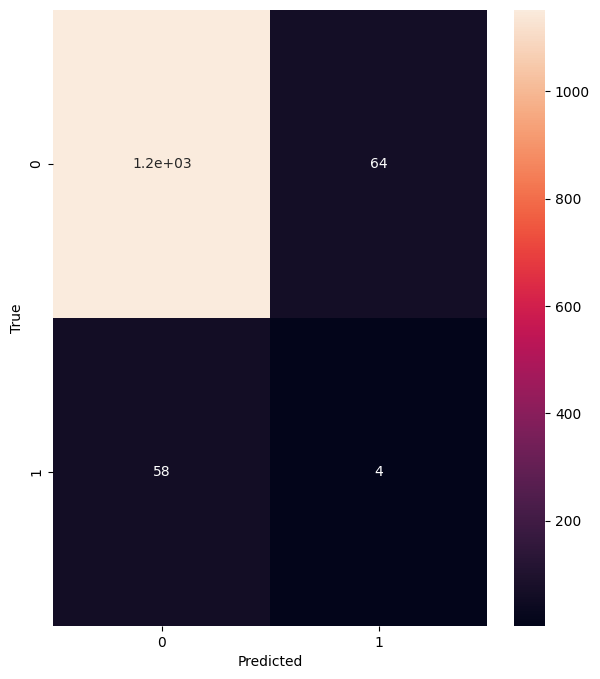

CPU times: user 320 ms, sys: 204 ms, total: 524 ms
Wall time: 317 ms


In [75]:
%%time
# evaluate the pipeline

eval_classification(tree_clf_pipe, X_train, X_test, y_train, y_test)

Without PCA - 0.08% accuracy, 514ms total time

With PCA - 0.90% accuracy, 584ms total time

## Without using PCA for Random Forest Classifier Model

In [57]:
%%time
# Without PCA
rf = RandomForestClassifier()

# Now we will build the pipeline
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

CPU times: user 457 ms, sys: 525 µs, total: 457 ms
Wall time: 463 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Train Report:               precision    recall  f1-score   support

           0       0.94      0.56      0.70      3644
           1       0.03      0.30      0.06       187

    accuracy                           0.55      3831
   macro avg       0.49      0.43      0.38      3831
weighted avg       0.90      0.55      0.67      3831

Test Report:               precision    recall  f1-score   support

           0       0.94      0.58      0.71      1216
           1       0.04      0.31      0.06        62

    accuracy                           0.56      1278
   macro avg       0.49      0.44      0.39      1278
weighted avg       0.90      0.56      0.68      1278



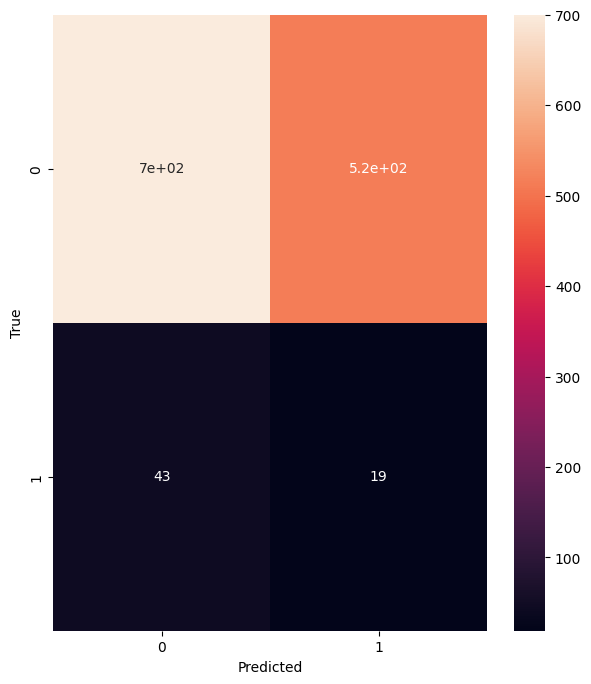

CPU times: user 360 ms, sys: 92.2 ms, total: 452 ms
Wall time: 358 ms


In [76]:
%%time
# evaluate the pipeline
eval_classification(rf, X_train, X_test, y_train, y_test)

## With PCA for Random Forest Classifier Model

In [77]:
rf_pipe = make_pipeline(scaler, pca, rf)

# fit the pipeline
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

Train Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



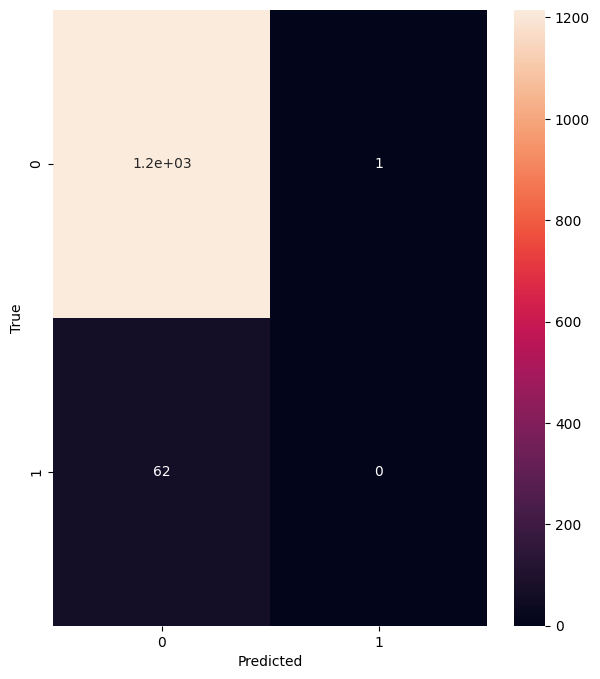

CPU times: user 614 ms, sys: 74.7 ms, total: 688 ms
Wall time: 1.31 s


In [79]:
%%time
# evaluate the pipeline

eval_classification(rf_pipe, X_train, X_test, y_train, y_test)

Without PCA - Accuracy is 0.56% and 452ms total time

With PCA - Accuracy is 0.95% and 688ms total time

## Without using PCA for Baggings Classifier Model

In [80]:
%%time
# Without PCA
bag = BaggingClassifier()

# Now we will build the pipeline
bag_pipe = make_pipeline(scaler, bag)
bag_pipe.fit(X_train, y_train)

CPU times: user 153 ms, sys: 540 µs, total: 154 ms
Wall time: 190 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier', BaggingClassifier())])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


Train Report:               precision    recall  f1-score   support

           0       0.95      0.61      0.74      3644
           1       0.04      0.35      0.08       187

    accuracy                           0.59      3831
   macro avg       0.50      0.48      0.41      3831
weighted avg       0.90      0.59      0.71      3831

Test Report:               precision    recall  f1-score   support

           0       0.95      0.60      0.73      1216
           1       0.05      0.39      0.08        62

    accuracy                           0.59      1278
   macro avg       0.50      0.49      0.41      1278
weighted avg       0.91      0.59      0.70      1278



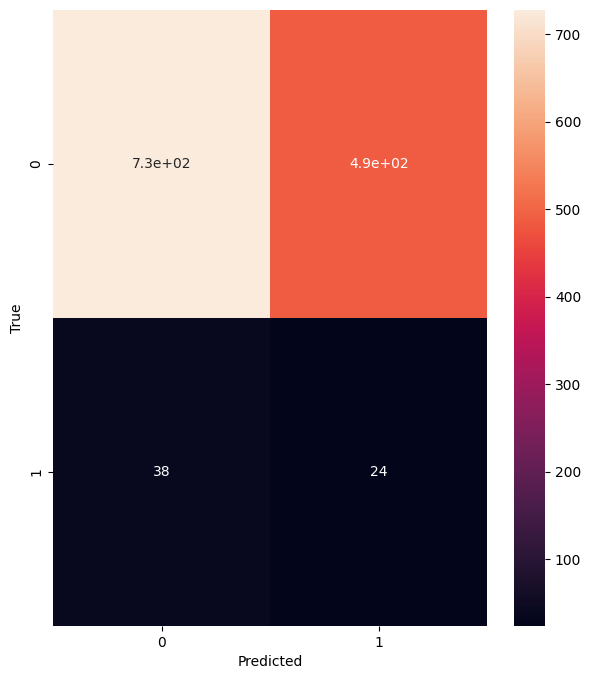

CPU times: user 486 ms, sys: 57.4 ms, total: 544 ms
Wall time: 1.02 s


In [81]:
%%time
# evaluate the pipeline
eval_classification(bag, X_train, X_test, y_train, y_test)

## With PCA for Baggings Classifier Model

In [82]:
bag_pipe = make_pipeline(scaler, pca, bag)

# fit the pipeline
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('baggingclassifier', BaggingClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3644
           1       1.00      0.85      0.92       187

    accuracy                           0.99      3831
   macro avg       1.00      0.93      0.96      3831
weighted avg       0.99      0.99      0.99      3831

Test Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.20      0.03      0.06        62

    accuracy                           0.95      1278
   macro avg       0.58      0.51      0.51      1278
weighted avg       0.92      0.95      0.93      1278



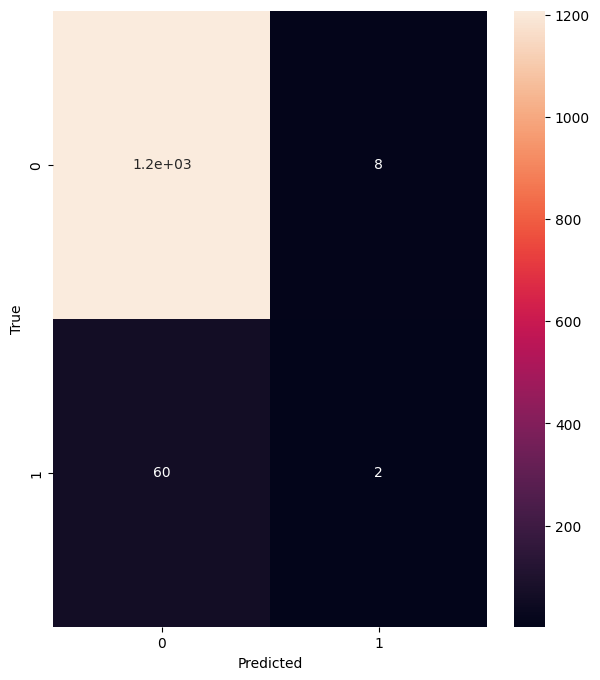

CPU times: user 423 ms, sys: 106 ms, total: 529 ms
Wall time: 455 ms


In [83]:
%%time
# evaluate the pipeline

eval_classification(bag_pipe, X_train, X_test, y_train, y_test)

Without PCA - Accuracy is 0.59% and 455ms total time

With PCA - Accuracy is 0.95% and 529ms total time

Final production model to be used:

The PCA models poduced a higher accuracy result as compared to the hypertune models.

Two of the 3 PCA models produced high accuracy and were almost identical in results. These PCA models were the Random Forest and Baggings Classifier Models.

However even though the Baggings Classifier produced a higher speed vs the Random Forest, the Random Forest Model produced a precsion of 100% as compared to 0.99% of the Baggings Classifier.

Since this model will be predicting the possiblities of having a stroke we require the best results therefore i owuld recommend the PCA Random Forest Classifier Model.
